In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift
from scipy import signal
%matplotlib widget

Util-функции

In [2]:
def draw_plots(rows, cols, width, height, subplot_data, legend_loc="best", legend_fontsize="small"):
    fig, axes = plt.subplots(rows, cols, figsize=(width, height))
    axes = axes.flatten() if rows * cols > 1 else [axes]

    flat_data = [item for row in subplot_data for item in row]

    for idx, data in enumerate(flat_data):
        if idx >= len(axes):
            raise ValueError(f"Too many subplots provided in 'subplot_data': expected at most {rows * cols}, got more.")
        if not data:
            continue

        ax = axes[idx]

        (
            x_arrays, y_arrays,
            labels,
            x_label, y_label,
            colors, linestyles,
            linewidth, markers,
            markersizes, title,
            markerevery
        ) = data + [None] * (12 - len(data))

        num_plots = len(y_arrays)

        for i in range(num_plots):
            x = x_arrays[i]
            y = y_arrays[i]

            label = labels[i] if labels and i < len(labels) else None
            color = colors[i] if colors and i < len(colors) else None
            linestyle = linestyles[i] if linestyles and i < len(linestyles) else '-'
            lw = linewidth[i] if linewidth and i < len(linewidth) else 2
            marker = markers[i] if markers and i < len(markers) else None
            markersize = markersizes[i] if markersizes and i < len(markersizes) else None
            mevery = markerevery[i] if markerevery and i < len(markerevery) else None

            ax.plot(x, y,
                    label=label,
                    color=color,
                    linestyle=linestyle,
                    linewidth=lw,
                    marker=marker,
                    markersize=markersize,
                    markevery=mevery)

        if labels:
            ax.legend(loc=legend_loc, fontsize=legend_fontsize)
        ax.grid(True)
        if x_label:
            ax.set_xlabel(x_label)
        if y_label:
            ax.set_ylabel(y_label)
        if title:
            ax.set_title(title)
    
    for idx in range(len(flat_data), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.gca().set_axisbelow(True) 
    plt.tight_layout()
    plt.show()

In [3]:
g = lambda t, a: a if (1 <= t <= 4) else 0
u = lambda t, a, b, c, d: g(t, a) + b * np.random.uniform(-1, 1) + c * np.sin(d * t)

# Задание 1.1

In [4]:
W_1 = lambda T, p: 1 / (T * p + 1)

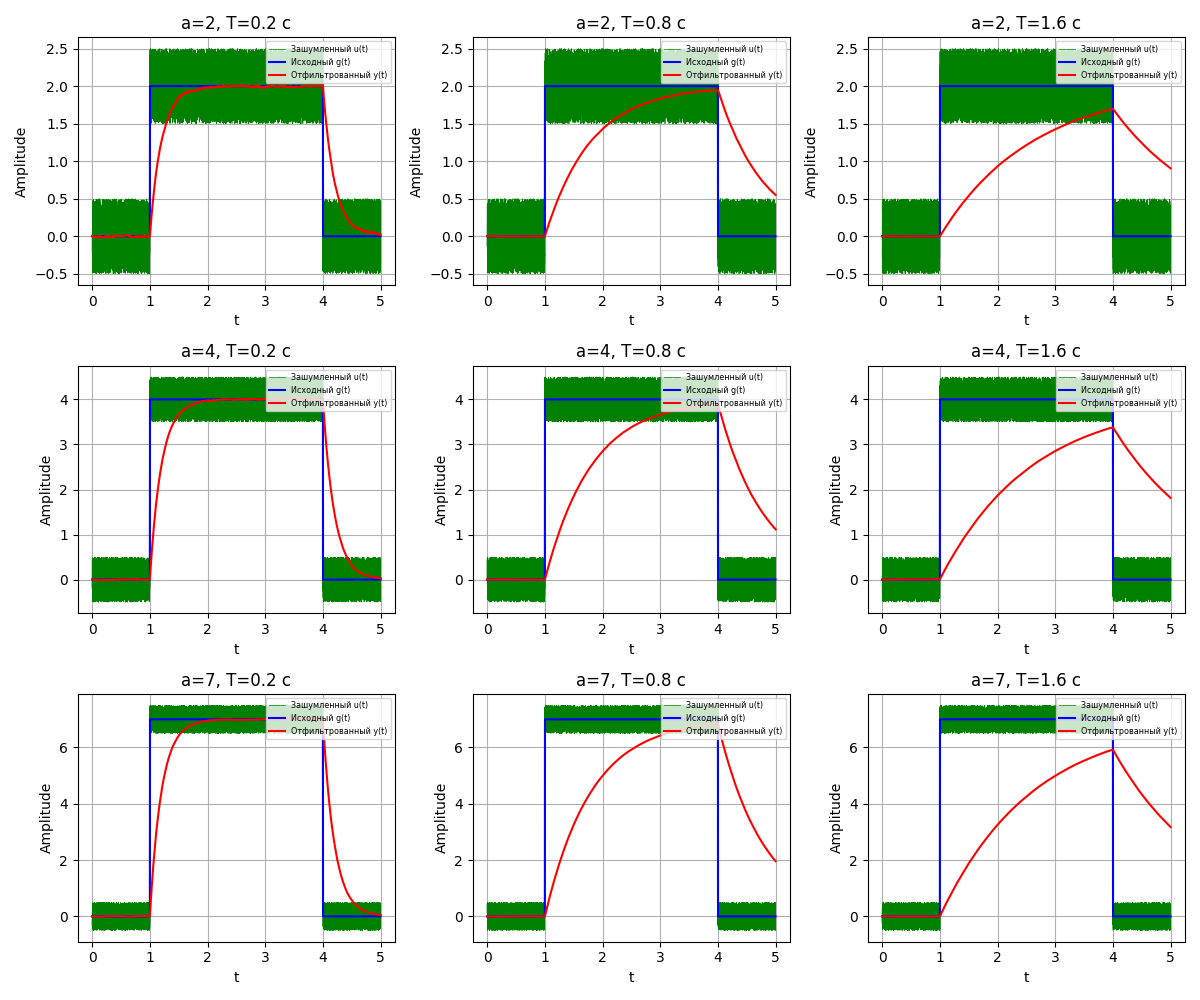

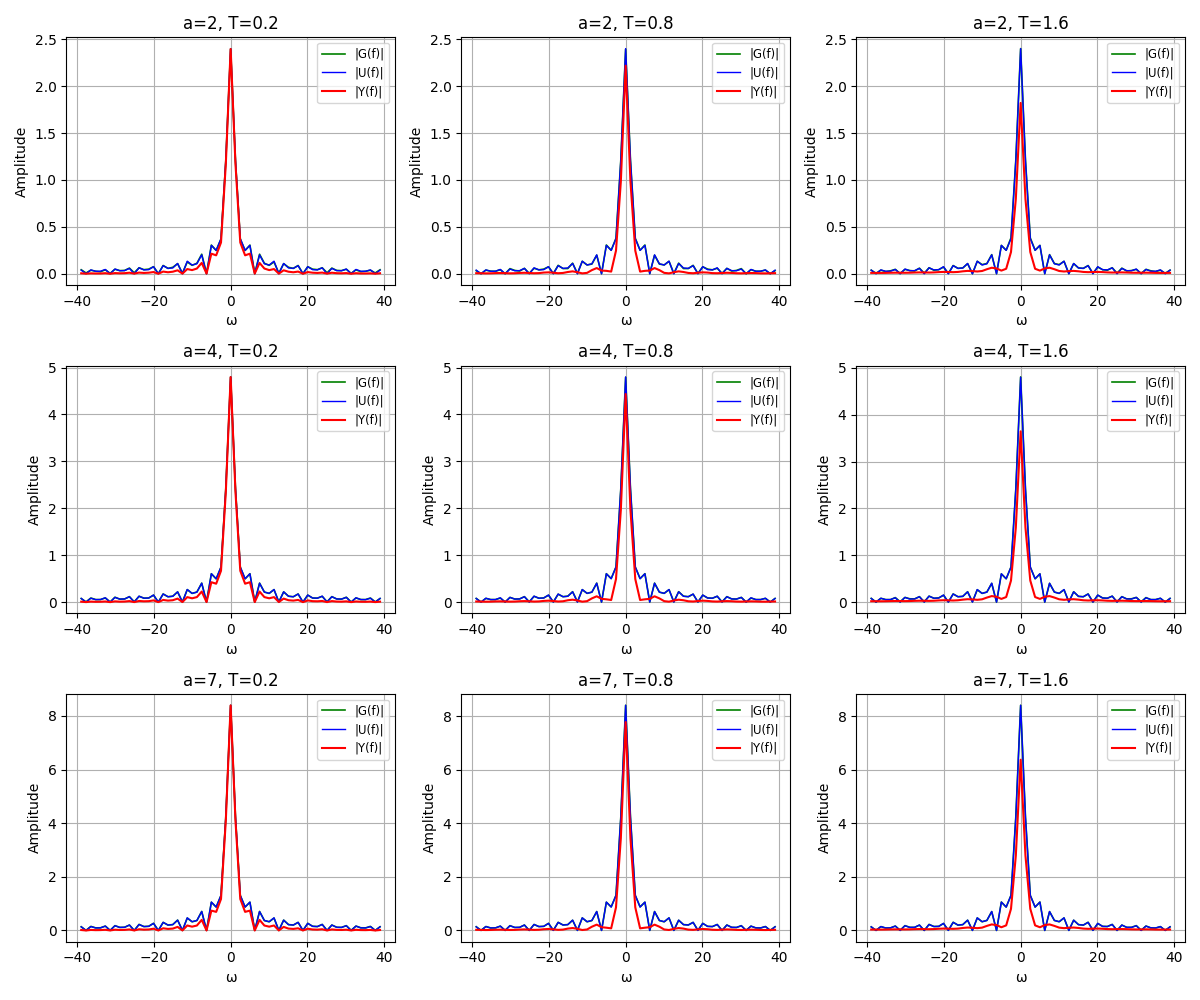

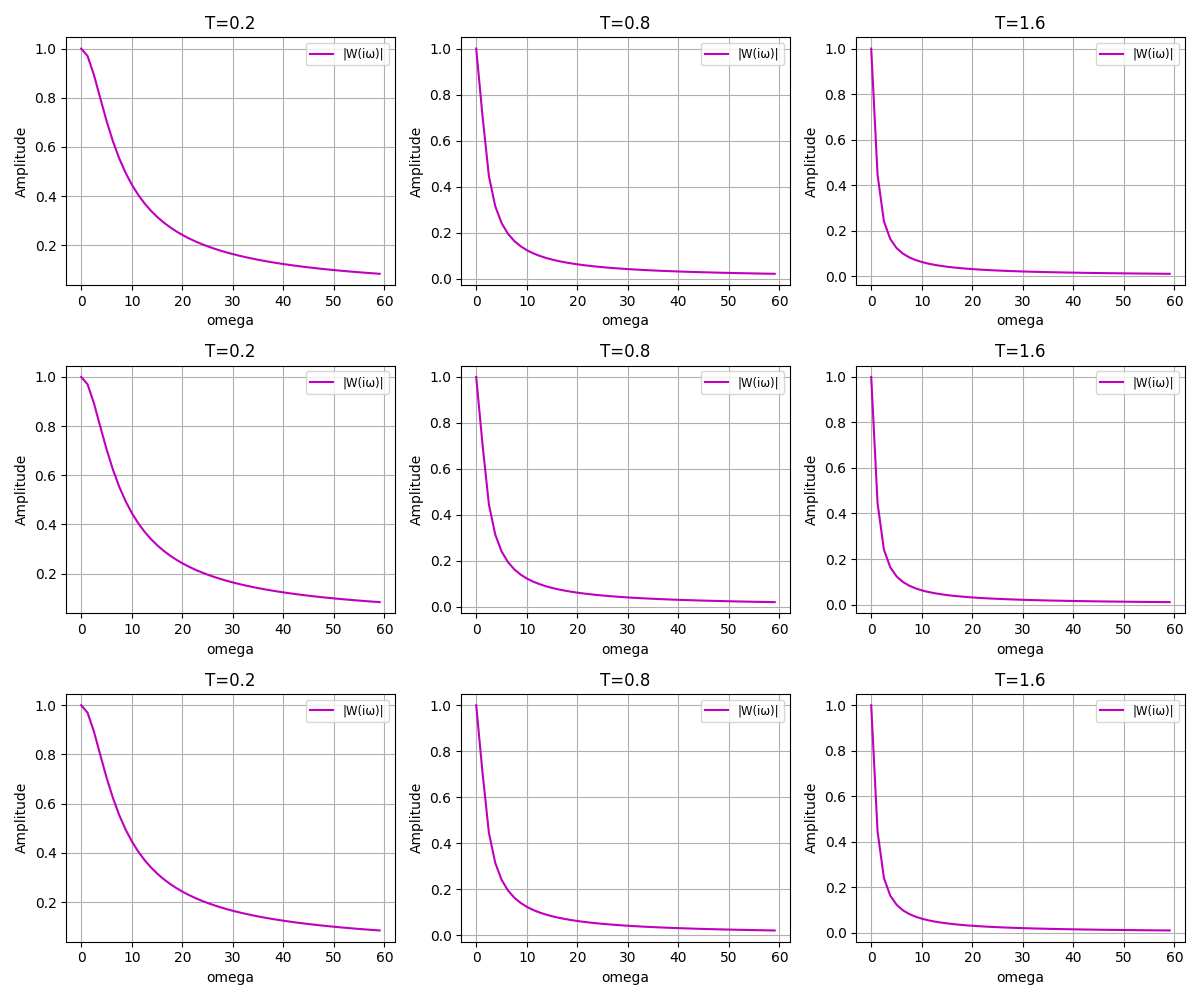

In [8]:
T_range = [0.2, 0.8, 1.6]
a_range = [2, 4, 7]
b = 0.5
c = 0
d = 10
plots_11 = []

t_start, t_end = 0, 5
num_points = 2 ** 14
t = np.linspace(t_start, t_end, num_points)
dt = t[1] - t[0]
N = len(t)

def calc_spectrum(signal):
    spectrum = fftshift(np.abs(fft(signal)))
    freq = 2 * np.pi * fftshift(fftfreq(len(signal), dt))
    return freq, spectrum

time_subplot_data = []
spectrum_subplot_data = []
freq_response_subplot_data = []

for i, a in enumerate(a_range):
    time_row = []
    spectrum_row = []
    freq_response_row = []
    
    for j, T in enumerate(T_range):
        g_signal = np.array([g(ti, a) for ti in t])
        u_signal = np.array([u(ti, a, b, c, d) for ti in t])
        
        sys = signal.TransferFunction([1], [T, 1])
        _, y_signal, _ = signal.lsim(sys, U=u_signal, T=t)
        
        f_g, spec_g = calc_spectrum(g_signal)
        f_u, spec_u = calc_spectrum(u_signal)
        f_y, spec_y = calc_spectrum(y_signal)
        
        w = f_g
        W_mag = 1 / np.sqrt(1 + (T * w)**2)
        
        afc_mask = (f_g >= 0) & (f_g < 60)
        omega_mask = np.abs(f_g) < 40
        
        time_plot = [
            [t] * 3,
            [u_signal, g_signal, y_signal],
            ['Зашумленный u(t)', 'Исходный g(t)', 'Отфильтрованный y(t)'],
            't', 'Amplitude',
            ['g', 'b', 'r'],
            ['-'] * 3,
            [0.5, 1.5, 1.5],
            [None] * 3,
            [None] * 3,
            f'a={a}, T={T} с',
        ]
        time_row.append(time_plot)

        spectrum_plot = [
            [f_u[omega_mask], f_g[omega_mask], f_y[omega_mask]],
            [2.0 / N * spec_u[omega_mask],
             2.0 / N * spec_g[omega_mask],
             2.0 / N * spec_y[omega_mask]
            ],
            ['|G(f)|', '|U(f)|', '|Y(f)|'],
            'ω', 'Amplitude',
            ['g', 'b', 'r'],
            ['-'] * 3,
            [1.2, 1.0, 1.5],
            [None] * 3,
            [None] * 3,
            f'a={a}, T={T}',
        ]
        spectrum_row.append(spectrum_plot)
        
        freq_response_plot = [
            [f_g[afc_mask]],
            [W_mag[afc_mask]],
            ['|W(iω)|'],
            'omega', 'Amplitude',
            ['m'],
            ['-'],
            [1.5],
            [None],
            [None],
            f'T={T}',
        ]
        freq_response_row.append(freq_response_plot)
    
    time_subplot_data.append(time_row)
    spectrum_subplot_data.append(spectrum_row)
    freq_response_subplot_data.append(freq_response_row)

draw_plots(
    rows=3,
    cols=3,
    width=12,
    height=10,
    subplot_data=time_subplot_data,
    legend_loc='upper right',
    legend_fontsize='xx-small'
)

draw_plots(
    rows=3,
    cols=3,
    width=12,
    height=10,
    subplot_data=spectrum_subplot_data,
    legend_loc='upper right'
)

draw_plots(
    rows=3,
    cols=3,
    width=12,
    height=10,
    subplot_data=freq_response_subplot_data,
    legend_loc='upper right'
)